In [2]:
%load_ext autoreload
%autoreload 2
import sys, os

# add LAQ path to PYTHONPATH
p = os.path.expanduser("~/Dropbox/ABACUS/Workspace/LeapArticulatorQt")
print p
sys.path.append(p)

/Users/Kerem/Dropbox/ABACUS/Workspace/LeapArticulatorQt


In [3]:
fname = "../../logs/logs/first_exp_data/123R0126514.1r.exp.log"
xy_lists = []
xy_lists_p = []

import numpy as np
import pandas as pd
def logToPandasFrame(logfile):   
    from leaparticulator.data.functions import fromFile, refactor_old_references
    import jsonpickle
    from itertools import product
    import numpy as np
    import pandas as pd

    results = fromFile(fname)

    responses, test_results, responses_practice, test_results_practice, images = results
    responses = responses['127.0.0.1']
    responses_p = responses_practice['127.0.0.1']
    phases = map(str, range(3))
    meanings = list(set(responses[phases[0]].keys() + responses[phases[1]].keys() + responses[phases[2]].keys()))
    columns=['phase', 'meaning', 'frame_index', 'x', 'y', 'practice']
    all_data = pd.DataFrame(columns=columns)
#     print all_data
    grand_index = 0
    for phase, meaning in product(phases, meanings):
        for response_dict in (responses, responses_p):
            frame = pd.DataFrame(columns=columns)
            if meaning not in response_dict[phase].keys():
                continue

            traj = [f.get_stabilized_position()[:2] for f in response_dict[phase][meaning] \
                    if meaning in response_dict[phase]]
            if response_dict == responses:
                xy_lists.append(traj)
            else:
                xy_lists_p.append(traj)
            index0 = grand_index
            index_f = grand_index + len(traj)
            index = range(grand_index, index_f)
            grand_index += len(traj)

            phase_l = []
            meaning_l = []
            xs = []
            ys = []
            i_s = []
            for i, (x, y) in enumerate(traj):
                xs.append(x)
                ys.append(y)
                i_s.append(i)
                phase_l.append(phase)
                meaning_l.append(meaning)
            practice = [response_dict == responses_p for _ in xs]
            for field, lst in zip(columns, [phase_l, meaning_l, i_s, xs, ys, practice]):
                frame[field] = pd.Series(name=field, data=lst, index=index)
            all_data = all_data.append(frame)
    return all_data
data = logToPandasFrame(fname)
data

,phase,meaning,frame_index,x,y,practice
0,0,./img/meanings/5_5.png,0,-40.896141,57.539577,False
1,0,./img/meanings/5_5.png,1,-39.608707,56.754345,False
2,0,./img/meanings/5_5.png,2,-37.660206,55.757832,False
3,0,./img/meanings/5_5.png,3,-35.488075,54.781792,False
4,0,./img/meanings/5_5.png,4,-33.160679,53.815193,False
5,0,./img/meanings/5_5.png,5,-30.718073,52.868710,False
6,0,./img/meanings/5_5.png,6,-27.730265,51.769203,False
7,0,./img/meanings/5_5.png,7,-23.707848,50.511745,False
8,0,./img/meanings/5_5.png,8,-17.726580,49.068867,False
9,0,./img/meanings/5_5.png,9,10.528526,32.254402,False


In [4]:
import pyhsmm
import pyhsmm.basic.distributions as distributions

obs_dim = 2
Nmax = 25

obs_hypparams = {'mu_0':np.zeros(obs_dim),
                'sigma_0':np.eye(obs_dim),
                'kappa_0':0.3,
                'nu_0':obs_dim+5}
# dur_hypparams = {'alpha_0':2*30,
#                  'beta_0':2}
dur_hypparams = {"k_0":.001,
                 'theta_0':.001,
                 "alpha_0":.001,
                 "beta_0":.001}
#                 "p_0":np.random.beta(.001,.001)}

# class GammaDuration(distributions.GN)
obs_distns = [distributions.Gaussian(**obs_hypparams) for state in range(Nmax)]
dur_distns = [distributions.NegativeBinomialDuration(**dur_hypparams) for state in range(Nmax)]

xy_lists

[[(-40.896141052246094, 57.53957748413086),
  (-39.608707427978516, 56.75434494018555),
  (-37.66020584106445, 55.75783157348633),
  (-35.488075256347656, 54.78179168701172),
  (-33.16067886352539, 53.81519317626953),
  (-30.71807289123535, 52.868709564208984),
  (-27.73026466369629, 51.769203186035156),
  (-23.707847595214844, 50.51174545288086),
  (-17.726579666137695, 49.06886672973633),
  (10.528526306152344, 32.25440216064453),
  (9.977033615112305, 32.39613342285156)],
 [(-51.00154113769531, 56.54701614379883),
  (-52.914669036865234, 55.68373107910156),
  (-55.24911117553711, 54.5045166015625),
  (-56.41621398925781, 53.636497497558594),
  (-57.09032440185547, 52.5757942199707),
  (-50.85272979736328, 51.40324020385742),
  (-39.80522155761719, 50.43159866333008)],
 [(-43.26353454589844, 57.19464111328125),
  (-44.603675842285156, 57.81247329711914),
  (-45.63425827026367, 58.301490783691406),
  (-46.35051727294922, 58.644554138183594),
  (-46.88166427612305, 58.852596282958984),

In [5]:
posteriormodel = pyhsmm.models.WeakLimitHDPHSMM(
        alpha_a_0=1.,alpha_b_0=1./4,
        gamma_a_0=1.,gamma_b_0=1./4, # better to sample over these; see concentration-resampling.py
        init_state_concentration=6., # pretty inconsequential
        obs_distns=obs_distns,
        dur_distns=dur_distns)
for xy, xy_p in zip(xy_lists, xy_lists_p):
    posteriormodel.add_data(xy)
#     posteriormodel.add_data(xy_p,trunc=100)

from copy import deepcopy
models = []
for idx in range(150):
    posteriormodel.resample_model()
    if (idx+1) % 50 == 0:
        print "Resample #%i done" % idx
        models.append(deepcopy(posteriormodel))

ZeroDivisionError: float division by zero

**************
[[  0.00000000e+000   2.99293973e-021   3.16180375e-085   4.75087356e-002
    3.34395812e-170   8.74344468e-049   1.32651847e-193   4.70110185e-008
    8.01691754e-001   3.33524744e-246   5.40276101e-094   0.00000000e+000
    5.33590898e-322   0.00000000e+000   1.99033686e-116   2.59204752e-025
    6.12907099e-041   9.77588678e-044   2.63571470e-252   1.99225473e-012
    3.00393672e-123   0.00000000e+000   4.75944008e-278   1.00435754e-166
    1.50799463e-001]
 [  1.09024776e-006   0.00000000e+000   0.00000000e+000   2.28012358e-030
    3.46358417e-128   1.82556224e-140   5.18227728e-094   2.15785009e-196
    2.27442359e-053   1.14417077e-001   0.00000000e+000   0.00000000e+000
    8.89080079e-165   1.28118022e-033   3.00779091e-001   1.60242506e-063
    4.66965681e-001   2.10781091e-038   0.00000000e+000   2.32455915e-089
    1.17837060e-001   0.00000000e+000   2.13061287e-062   0.00000000e+000
    4.04597647e-042]
 [  1.85166462e-003   7.43321771e-003   0.00000000e+000

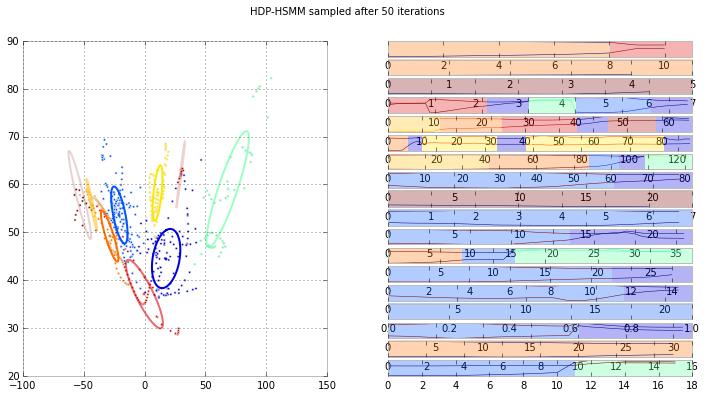

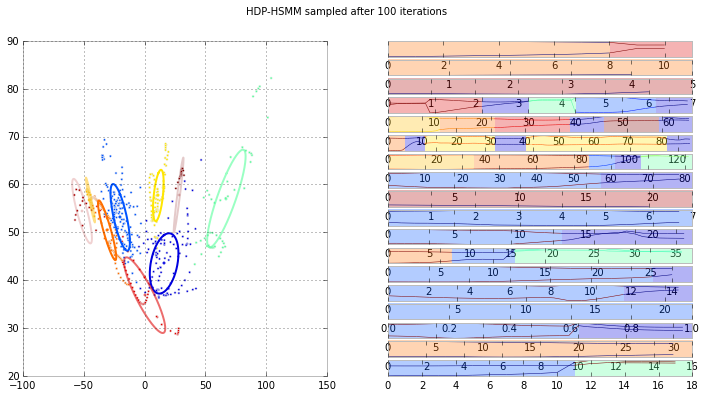

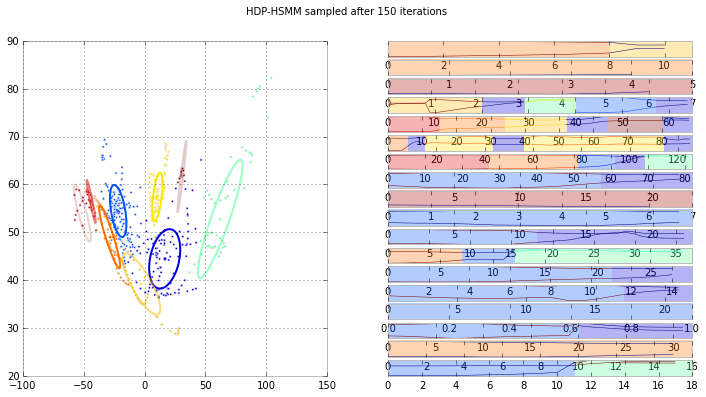

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
for idx, model in enumerate(models):
    print "**************"
    fig = plt.figure()
    plt.clf()
    model.plot()
    print model.states_list[0].trans_matrix
    plt.gcf().suptitle('HDP-HSMM sampled after %d iterations' % (50*(idx+1)))
#     plt.gcf().suptitle('HDP-HSMM sampled after 150 iterations')

In [5]:
%matplotlib inline
model = models[-1]
print (model.stateseqs[0])
print (model.stateseqs[8])
print model.used_states
    # print model.state_usages
# # for dist, n in zip(model.dur_distns, model.state_usages):
# #     if n > 0.01:
# #         dist.plot()
# state = model.states_list[0]
# print state.durations
# state.durations
# dist = state.obs_distns[0]
# dist.mu

[20 20 20 20 20 20 20 20 20 20 20]
[4 4 4 4 4 4 4]
[20, 4, 3, 17, 12, 11, 22, 16, 15, 18]


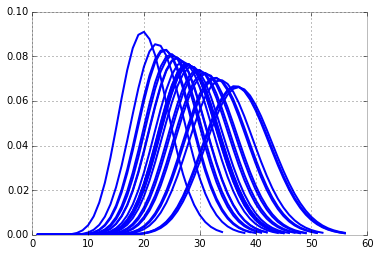

In [6]:
for dur in model.dur_distns:
    dur.plot()